# Transpose

In [ ]:
import numpy as np

In [60]:
vector = np.array([[1,2,3,4,5,6]])
matrix = np.array([[1,2,3],[4,5,6]])

print("Vector: \n", vector)
print()
print("Transpose of vector: \n", vector.T)
#print("Transpose of vector:", np.transpose(vector))

print()

print("Matrix: \n", matrix)
print()
print("Transpose of matrix: \n", matrix.T)
#print("Transpose of matrix:", np.transpose(matrix))

Vector: 
 [[1 2 3 4 5 6]]

Transpose of vector: 
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

Matrix: 
 [[1 2 3]
 [4 5 6]]

Transpose of matrix: 
 [[1 4]
 [2 5]
 [3 6]]


## Identity Matrix <a class="anchor" id="identity_matrix"></a> 

In [61]:
A = np.array([[1,2],[3,4]])
I = np.identity(2, dtype=int) # dtype = float (default)

print("I: \n", I)
print()
print("AI: \n", np.dot(A, I))
print()
print("A: \n", A)

I: 
 [[1 0]
 [0 1]]

AI: 
 [[1 2]
 [3 4]]

A: 
 [[1 2]
 [3 4]]


## Inverse matrix <a class="anchor" id="inverse_matrix"></a>

In [66]:
A = np.array([[1,2],[3,4]])

print("A: \n", A)
print()
print("inverse of A is: \n", np.linalg.inv(A))

Ainv = np.linalg.inv(A)
print(np.matmul(A,Ainv))


A: 
 [[1 2]
 [3 4]]

inverse of A is: 
 [[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


# Vector Operations

In this notebook you will use Python and `NumPy` functions to perform main vector operations: scalar multiplication, sum of vectors and their dot product. You will also investigate the speed of calculations using loop and vectorized forms of these main linear algebra operations

<a name='1'></a>
##  Scalar Multiplication and Sum of Vectors

<a name='1.1'></a>
###  Visualization of a Vector $v\in\mathbb{R}^2$


The following code will show the visualization.

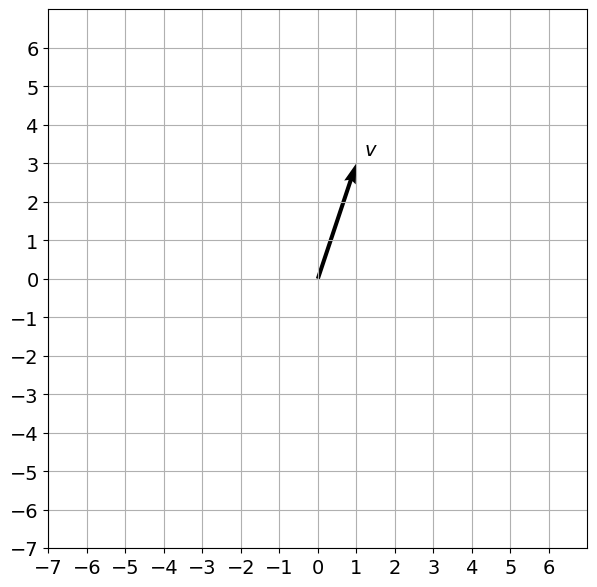

In [67]:
import matplotlib.pyplot as plt

def plot_vectors(list_v, list_label, list_color):
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-7, 7))
    ax.set_yticks(np.arange(-7, 7))
    
    
    plt.axis([-7, 7, -7, 7])
    for i, v in enumerate(list_v):
        sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v)])
        plt.quiver(v[0], v[1], color=list_color[i], angles='xy', scale_units='xy', scale=1)
        ax.text(v[0]-0.2+sgn[0], v[1]-0.2+sgn[1], list_label[i], fontsize=14, color=list_color[i])

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

v = np.array([[1],[3]])
# Arguments: list of vectors as NumPy arrays, labels, colors.
plot_vectors([v], [f"$v$"], ["black"])

The vector is defined by its **norm (length, magnitude)** and **direction**, not its actual position. But for clarity and convenience vectors are often plotted starting in the origin (in $\mathbb{R}^2$ it is a point $(0,0)$) .

<a name='1.2'></a>
### Scalar Multiplication

**Scalar multiplication** of a vector $v=\begin{bmatrix}
          v_1 & v_2 & \ldots & v_n 
\end{bmatrix}^T\in\mathbb{R}^n$ by a scalar $k$ is a vector $kv=\begin{bmatrix}
          kv_1 & kv_2 & \ldots & kv_n 
\end{bmatrix}^T$ (element by element multiplication). If $k>0$, then $kv$ is a vector pointing in the same direction as $v$ and it is $k$ times as long as $v$. If $k=0$, then $kv$ is a zero vector. If $k<0$, vector $kv$ will be pointing in the opposite direction. In Python you can perform this operation with a `*` operator. Check out the example below:

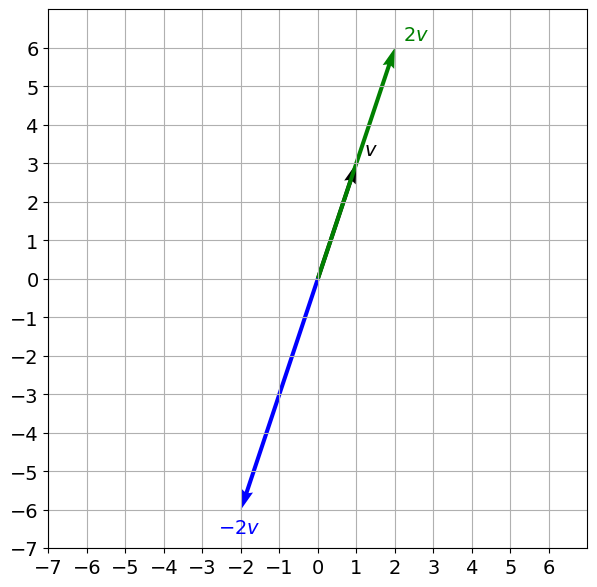

In [68]:
plot_vectors([v, 2*v, -2*v], [f"$v$", f"$2v$", f"$-2v$"], ["black", "green", "blue"])

<a name='1.3'></a>
###  Sum of Vectors

**Sum of vectors (vector addition)** can be performed by adding the corresponding components of the vectors: if $v=\begin{bmatrix}
          v_1 & v_2 & \ldots & v_n 
\end{bmatrix}^T\in\mathbb{R}^n$ and  
$w=\begin{bmatrix}
          w_1 & w_2 & \ldots & w_n 
\end{bmatrix}^T\in\mathbb{R}^n$, then $v + w=\begin{bmatrix}
          v_1 + w_1 & v_2 + w_2 & \ldots & v_n + w_n 
\end{bmatrix}^T\in\mathbb{R}^n$. The so-called **parallelogram law** gives the rule for vector addition. For two vectors $u$ and $v$ represented by the adjacent sides (both in magnitude and direction) of a parallelogram drawn from a point, the vector sum $u+v$ is is represented by the diagonal of the parallelogram drawn from the same point:

<img src = "images/sum_of_vectors.png" width="230" align="middle"/>

In Python you can either use `+` operator or `NumPy` function `np.add()`. In the following code you can uncomment the line to check that the result will be the same:

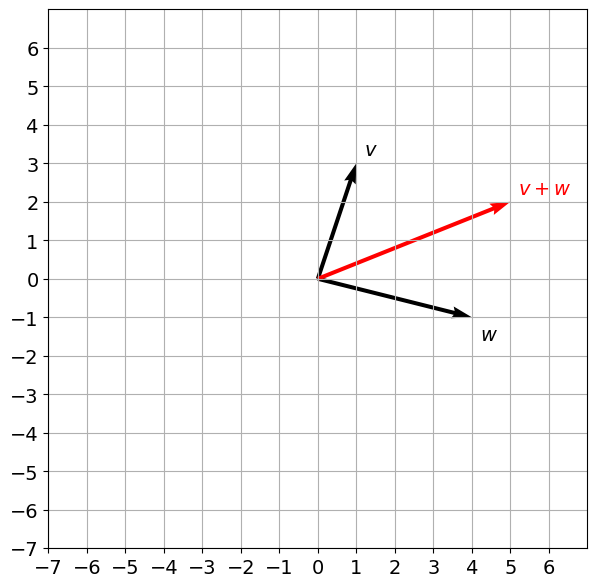

In [69]:
v = np.array([[1],[3]])
w = np.array([[4],[-1]])

plot_vectors([v, w, v + w], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])
# plot_vectors([v, w, np.add(v, w)], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])

<a name='1.4'></a>
### Norm of a Vector

The norm of a vector $v$ is denoted as $\lvert v\rvert$. It is a nonnegative number that describes the extent of the vector in space (its length). The norm of a vector can be found using `NumPy` function `np.linalg.norm()`:

In [70]:
print("Norm of a vector v is", np.linalg.norm(v))

Norm of a vector v is 3.1622776601683795


<a name='2'></a>
##  Dot Product

<a name='2.1'></a>
###  Algebraic Definition of the Dot Product

The **dot product** (or **scalar product**) is an algebraic operation that takes two vectors $x=\begin{bmatrix}
          x_1 & x_2 & \ldots & x_n 
\end{bmatrix}^T\in\mathbb{R}^n$ and  
$y=\begin{bmatrix}
          y_1 & y_2 & \ldots & y_n 
\end{bmatrix}^T\in\mathbb{R}^n$ and returns a single scalar. The dot product can be represented with a dot operator $x\cdot y$ and defined as:

$$x\cdot y = \sum_{i=1}^{n} x_iy_i = x_1y_1+x_2y_2+\ldots+x_ny_n \tag{1}$$

<a name='2.2'></a>
###  Dot Product using Python

The simplest way to calculate dot product in Python is to take the sum of element by element multiplications. You can define the vectors $x$ and $y$ by listing their coordinates:

In [71]:
x = [1, -2, -5]
y = [4, 3, -1]

Next, let’s define a function `dot(x,y)` for the dot product calculation:

In [72]:
def dot(x, y):
    s=0
    for xi, yi in zip(x, y):
        s += xi * yi
    return s

For the sake of simplicity, let’s assume that the vectors passed to the above function are always of the same size, so that you don’t need to perform additional checks.

Now everything is ready to perform the dot product calculation calling the function `dot(x,y)`:

In [73]:
print("The dot product of x and y is", dot(x, y))

The dot product of x and y is 3


Dot product is very a commonly used operator, so `NumPy` linear algebra package provides quick way to calculate it using function `np.dot()`:

In [74]:
print("np.dot(x,y) function returns dot product of x and y:", np.dot(x, y)) 

np.dot(x,y) function returns dot product of x and y: 3


Note that you did not have to define vectors $x$ and $y$ as `NumPy` arrays, the function worked even with the lists. 

It is recommended to define vectors as `NumPy` arrays to avoid errors. 

In [75]:
x = np.array(x)
y = np.array(y)

<a name='2.3'></a>
### Speed of Calculations in Vectorized Form

Dot product operations in Machine Learning applications are applied to the large vectors with hundreds or thousands of coordinates (called **high dimensional vectors**). Training models based on large datasets often takes hours and days even on powerful machines. Speed of calculations is crucial for the training and deployment of your models. 

It is important to understand the difference in the speed of calculations using vectorized and the loop forms of the vectors and functions. In the loop form operations are performed one by one, while in the vectorized form they can be performed in parallel. In the section above you defined loop version of the dot product calculation (function `dot()`), while `np.dot()` and `@` are the functions representing vectorized form.

Let's perform a simple experiment to compare their speed. Define new vectors $a$ and $b$ of the same size $1,000,000$:

In [76]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

Use `time.time()` function to evaluate amount of time (in seconds) required to calculate dot product using the function `dot(x,y)` which you defined above: 

In [77]:
import time

tic = time.time()
c = dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the loop version:" + str(1000*(toc-tic)) + " ms")

Dot product:  250028.94670654036
Time for the loop version:157.40227699279785 ms


Now compare it with the speed of the vectorized versions:

In [78]:
tic = time.time()
c = np.dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the vectorized version, np.dot() function: " + str(1000*(toc-tic)) + " ms")

Dot product:  250028.94670654036
Time for the vectorized version, np.dot() function: 2.3109912872314453 ms


You can see that vectorization is extremely beneficial in terms of the speed of calculations!

# Matrix Multiplication

Here you will use `NumPy` functions to perform matrix multiplication and see how it can be used in the Machine Learning applications. 

<a name='1'></a>
## Definition of Matrix Multiplication

If $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix, the matrix product $C = AB$  is defined to be the $m \times p$ matrix.


<a name='2'></a>
## Matrix Multiplication using Python

Like with the dot product, there are a few ways to perform matrix multiplication in Python. As discussed above, the calculations are more efficient in the vectorized form. Let's discuss the most commonly used functions in the vectorized form. First, define two matrices:

In [79]:
A = np.array([[4, 9, 9], [9, 1, 6], [9, 2, 3]])
print("Matrix A (3 by 3):\n", A)

B = np.array([[2, 2], [5, 7], [4, 4]])
print("Matrix B (3 by 2):\n", B)

Matrix A (3 by 3):
 [[4 9 9]
 [9 1 6]
 [9 2 3]]
Matrix B (3 by 2):
 [[2 2]
 [5 7]
 [4 4]]


You can multiply matrices $A$ and $B$ using `NumPy` package function `np.matmul()`:

In [80]:
np.matmul(A, B)

array([[ 89, 107],
       [ 47,  49],
       [ 40,  44]])

Which will output $3 \times 2$ matrix as a `np.array`. Python operator `@` will also work here giving the same result:

In [81]:
A @ B

array([[ 89, 107],
       [ 47,  49],
       [ 40,  44]])

<a name='3'></a>
## Matrix Convention and Broadcasting

Mathematically, matrix multiplication is defined only if number of the columns of matrix $A$ is equal to the number of the rows of matrix $B$ (you can check again the definition in the secition [1](#1) and see that otherwise the dot products between rows and columns will not be defined). 

Thus, in the example above ([2](#2)), changing the order of matrices when performing the multiplication $BA$ will not work as the above rule does not hold anymore. You can check it by running the cells below - both of them will give errors.

In [82]:
try:
    np.matmul(B, A)
except ValueError as err:
    print(err)

matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)


In [83]:
try:
    B @ A
except ValueError as err:
    print(err)

matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)


So when using matrix multiplication you will need to be very careful about the dimensions - the number of the columns in the first matrix should match the number of the rows in the second matrix. This is very important for your future understanding of Neural Networks and how they work. 

However, for multiplying of the vectors, `NumPy` has a shortcut. You can define two vectors $x$ and $y$ of the same size (which one can understand as two $3 \times 1$ matrices). If you check the shape of the vector $x$, you can see that :

#  Eigenvalues and Eigenvectors

### Finding Eigenvalues and Eigenvectors with Python

In Python eigenvalues and eigenvectors can be found using the `NumPy` function `np.linalg.eig()`. It returns a tuple consisting of a vector and an array. The vector contains the eigenvalues. The array contains the corresponding eigenvectors, one eigenvector per column. The eigenvectors chosen are the normalized ones, so their norms are 1.

With the following code you can find an eigenvalues and eigenvectors for the matrix $A$:

In [85]:
A = np.array([[2, 3],[2, 1]])
A


array([[2, 3],
       [2, 1]])

In [86]:
A_eig = np.linalg.eig(A)

print("Matrix A:\n", A, "\n\n Eigenvalues and eigenvectors of matrix A:\n", A_eig)

Matrix A:
 [[2 3]
 [2 1]] 

 Eigenvalues and eigenvectors of matrix A:
 (array([ 4., -1.]), array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))


First eigenvector can be extrancted with the code `A_eig[1][:,0]` and second eigenvector with the code `A_eig[1][:,1]`. 

In [87]:
print('The first eigenvector:', A_eig[1][:,0],'\n\nThe second eigenvector:', A_eig[1][:,1] )

The first eigenvector: [0.83205029 0.5547002 ] 

The second eigenvector: [-0.70710678  0.70710678]
